In [1]:
from skimage import io as skio
url = 'C:/Users/lenovo/Downloads/WhatsApp Image 2020-04-18 at 18.18.57.jpeg'
img = skio.imread(url)

In [2]:
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

shape of image: (1152, 864, 3)
dtype of image: uint8


In [3]:
import cv2
  
image = cv2.imread('C:/Users/lenovo/Downloads/WhatsApp Image 2020-04-18 at 18.18.57.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
cv2.imshow('Original image',image)
cv2.imshow('Gray image', gray)
  
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [4]:
from skimage import filters
sobel = filters.sobel(gray)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 800

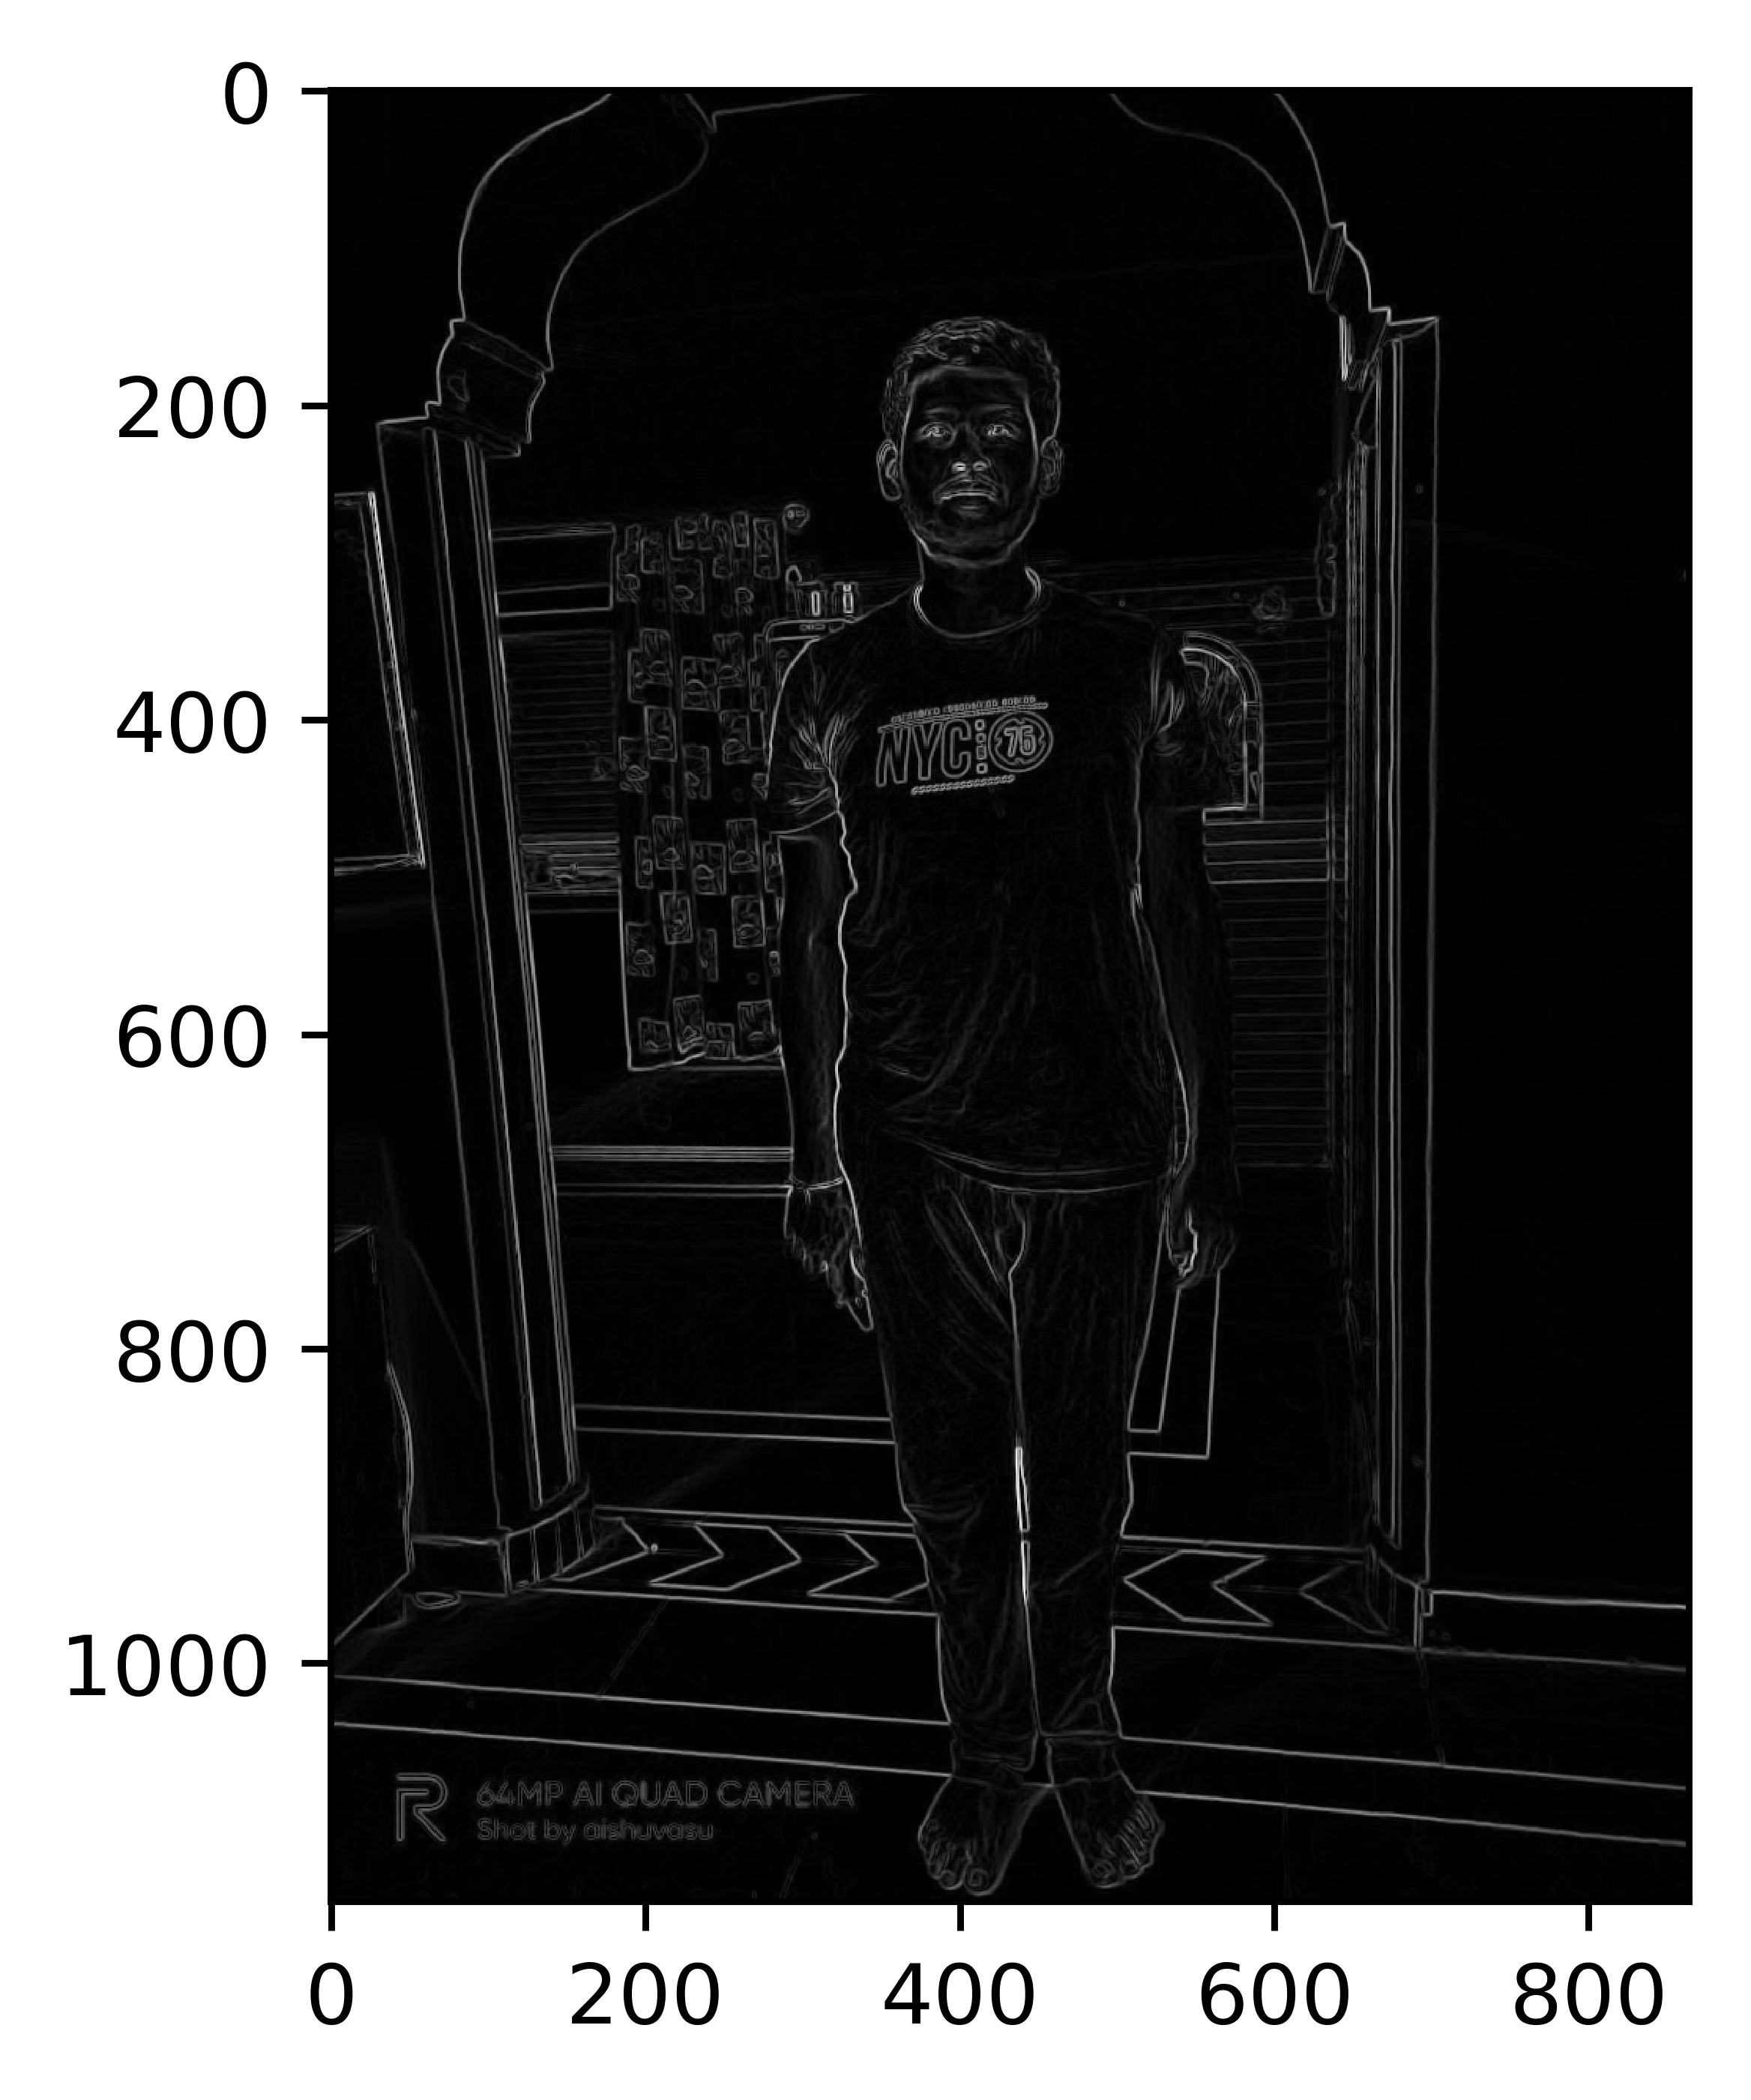

In [8]:
plt.imshow(sobel)

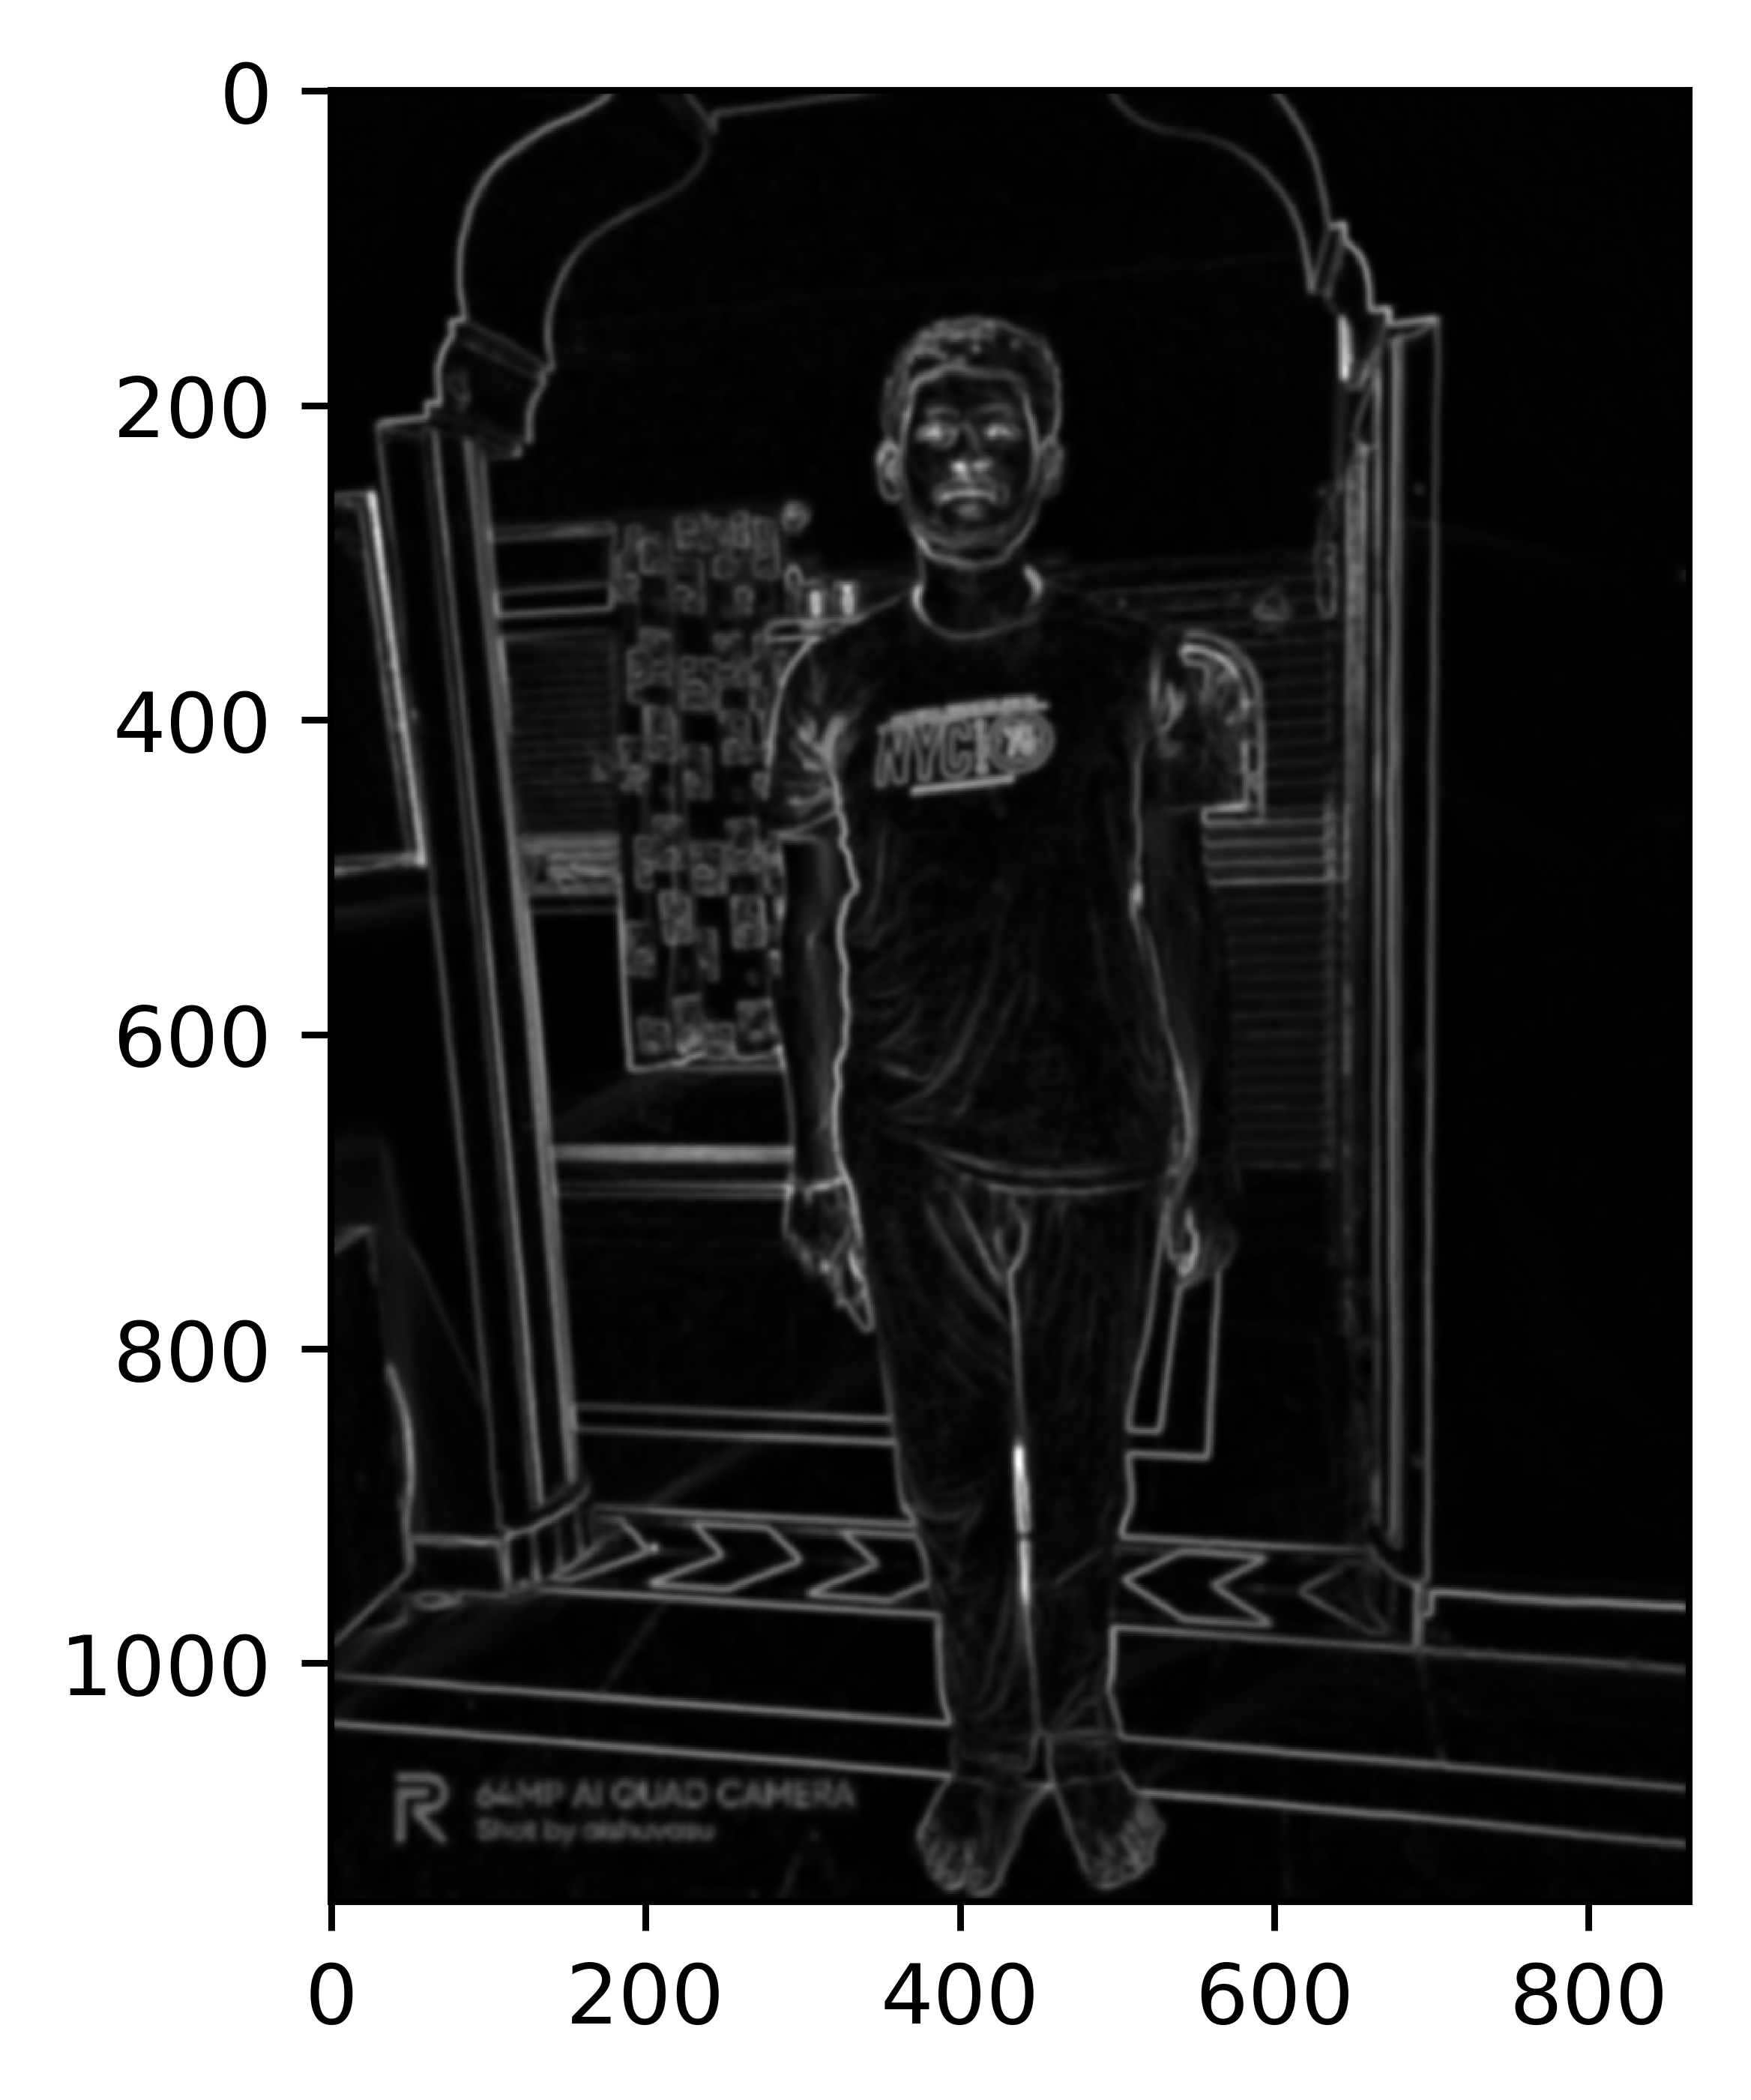

In [9]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

In [18]:
import numpy as np
light_spots = np.array((gray > 245).nonzero()).T

In [19]:
light_spots.shape

(5590, 2)

Text(0.5, 1.0, 'light spots in image')

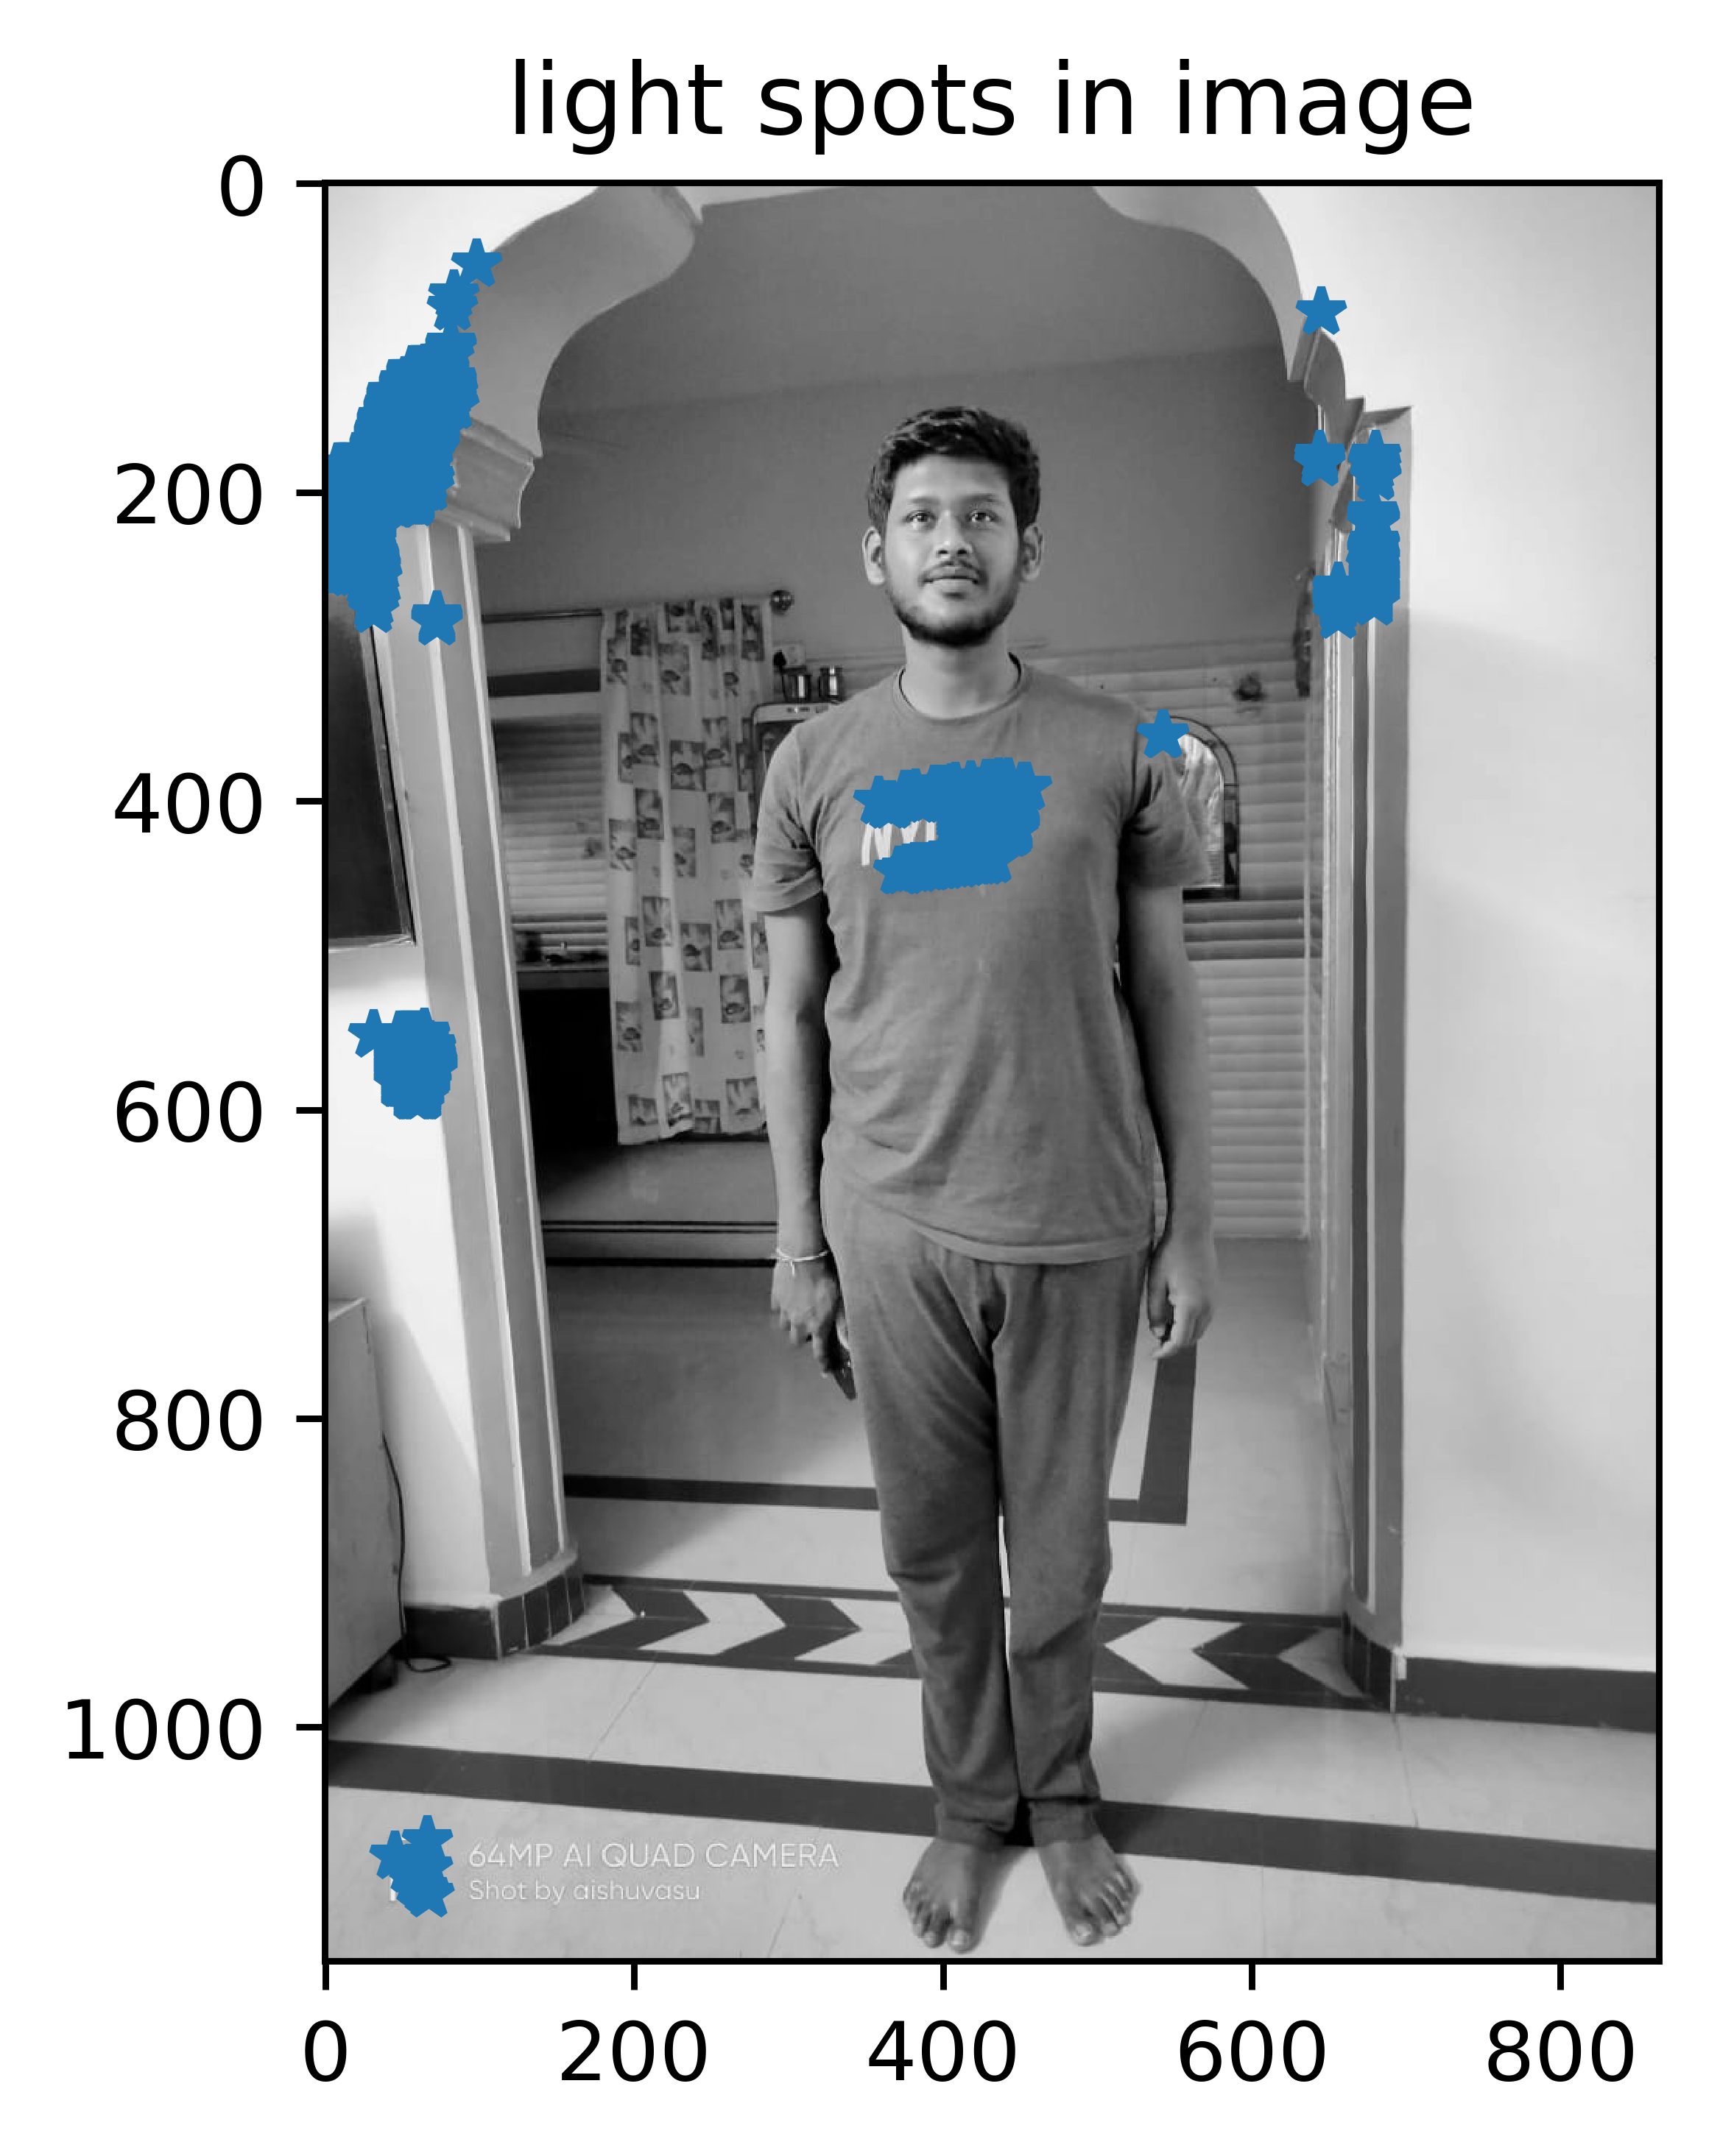

In [20]:
plt.plot(light_spots[:, 1], light_spots[:, 0], '*')
plt.imshow(gray)
plt.title('light spots in image')

In [21]:
dark_spots = np.array((gray < 3).nonzero()).T

In [22]:
dark_spots.shape

(8450, 2)

Text(0.5, 1.0, 'dark spots in image')

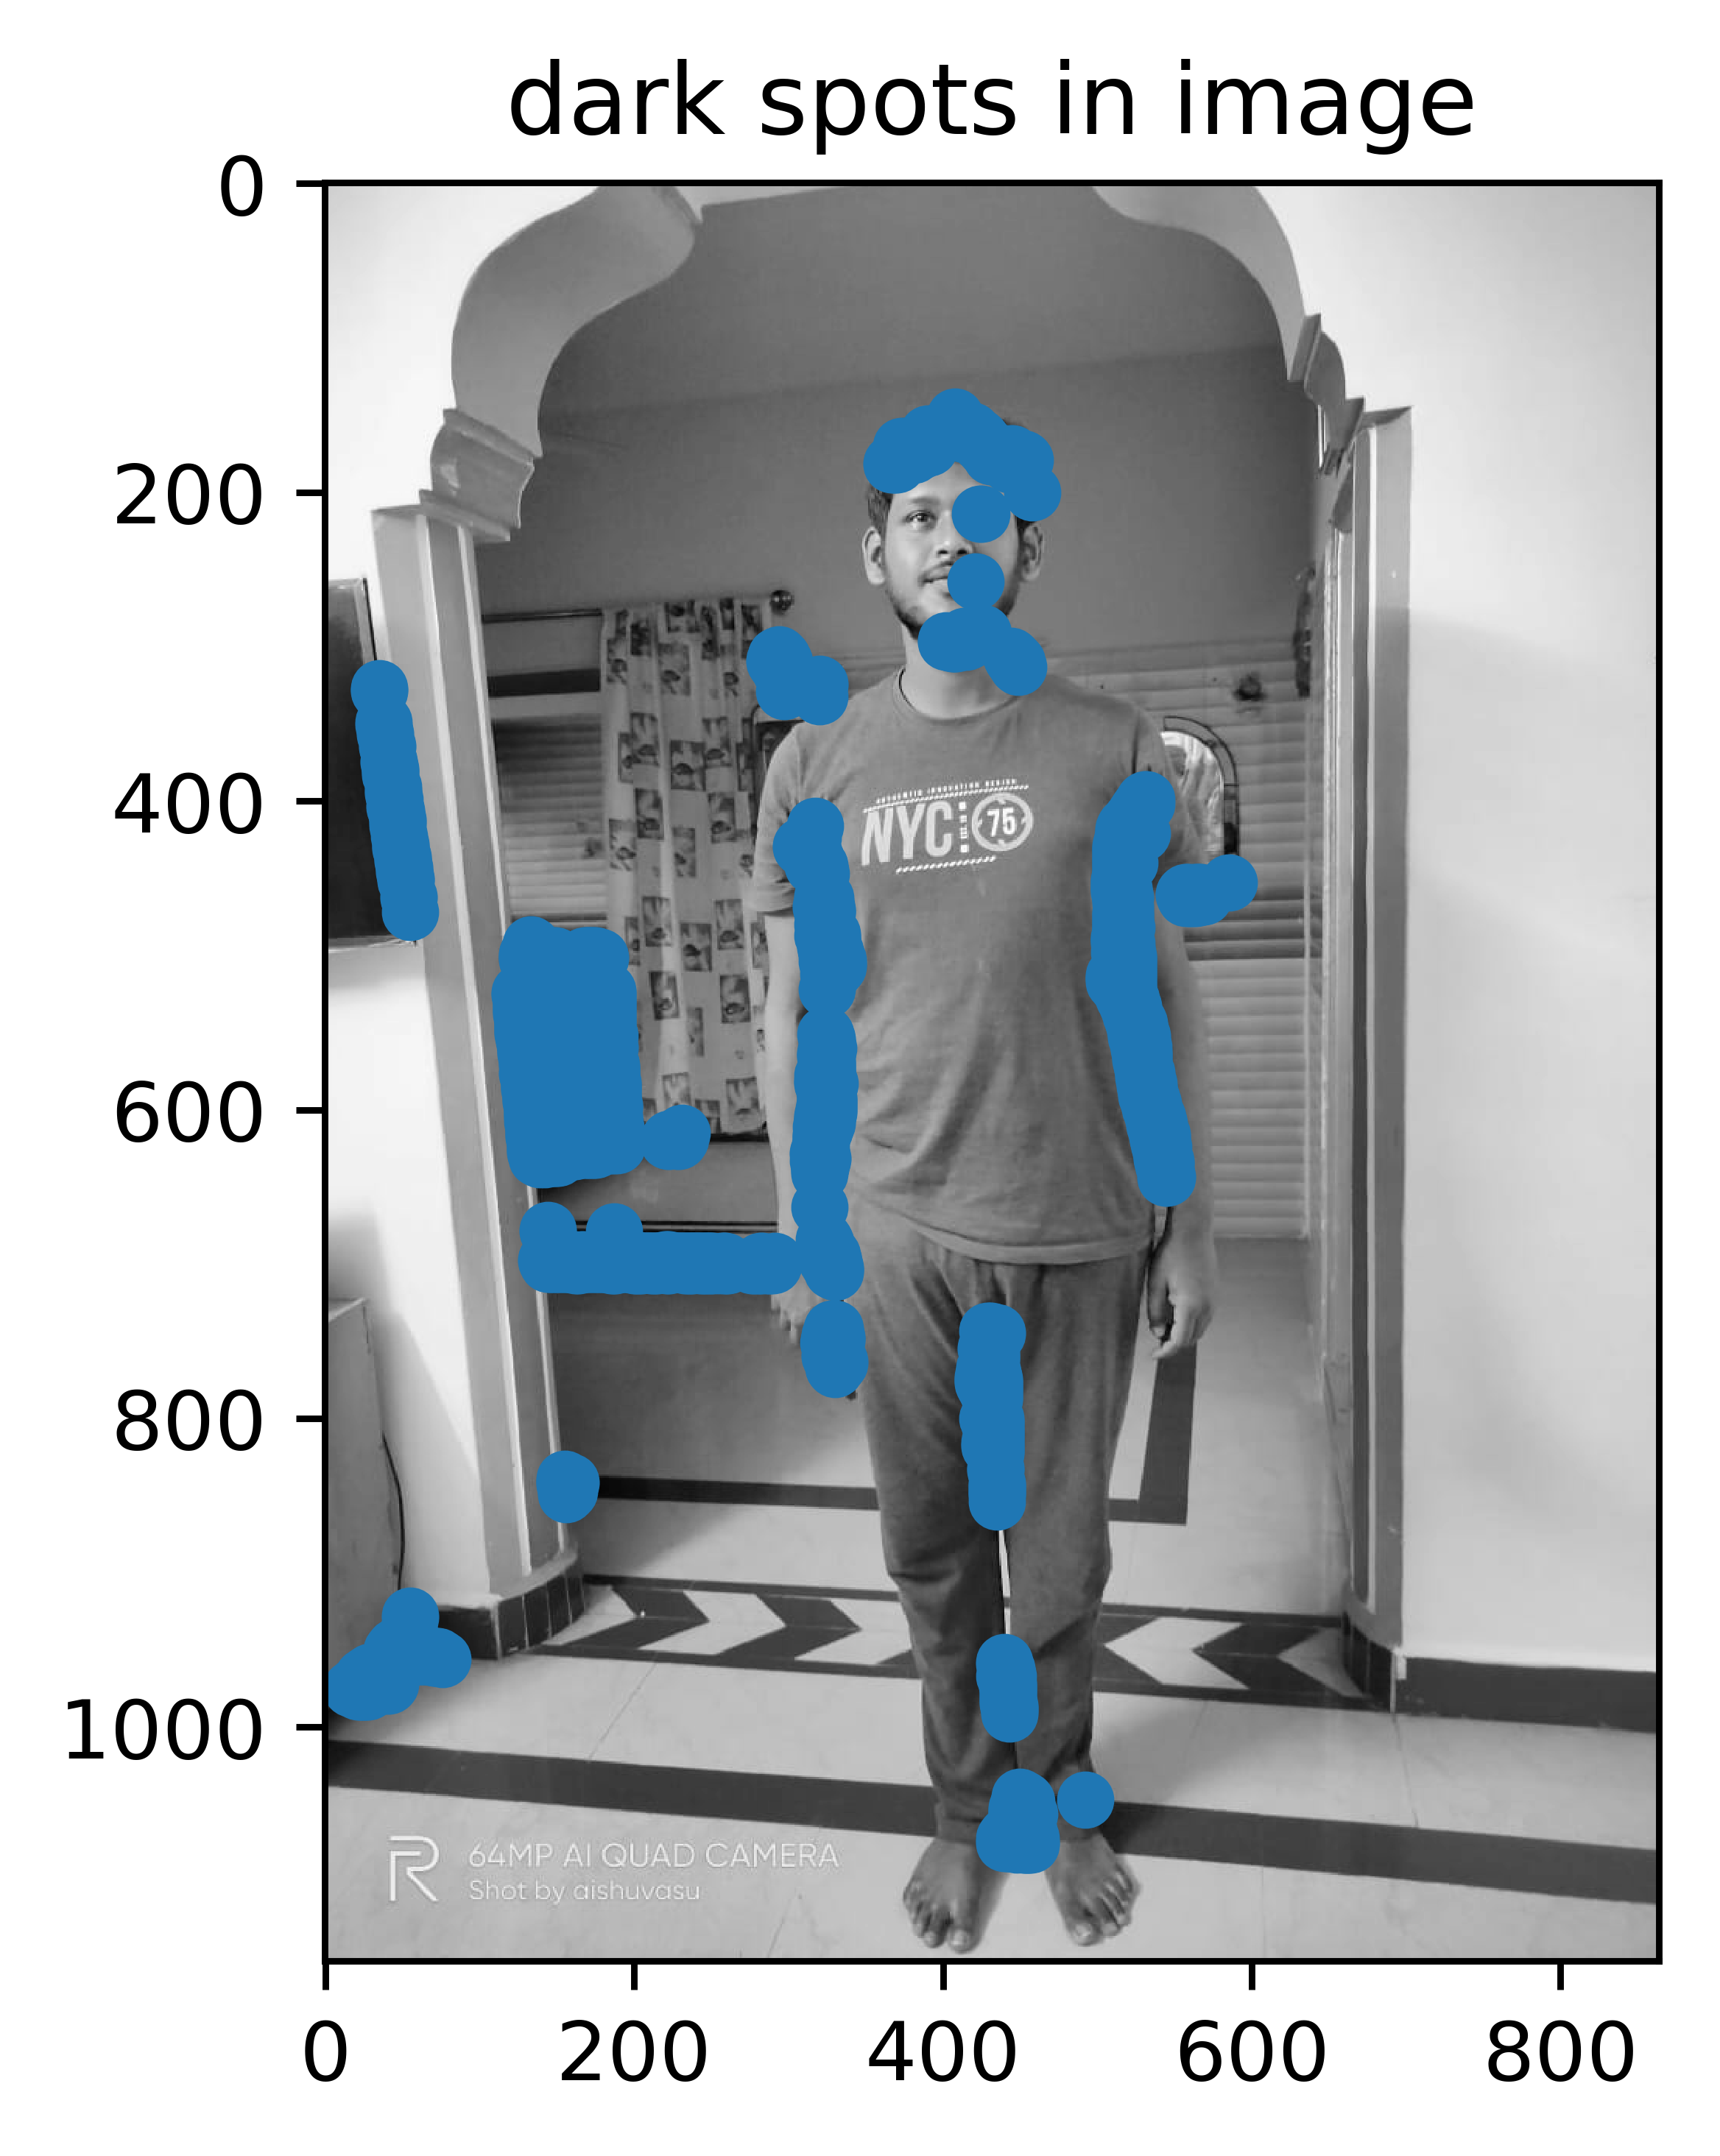

In [23]:
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(gray)
plt.title('dark spots in image')

In [24]:
from scipy import ndimage as ndi
bool_mask = np.zeros(gray.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

323

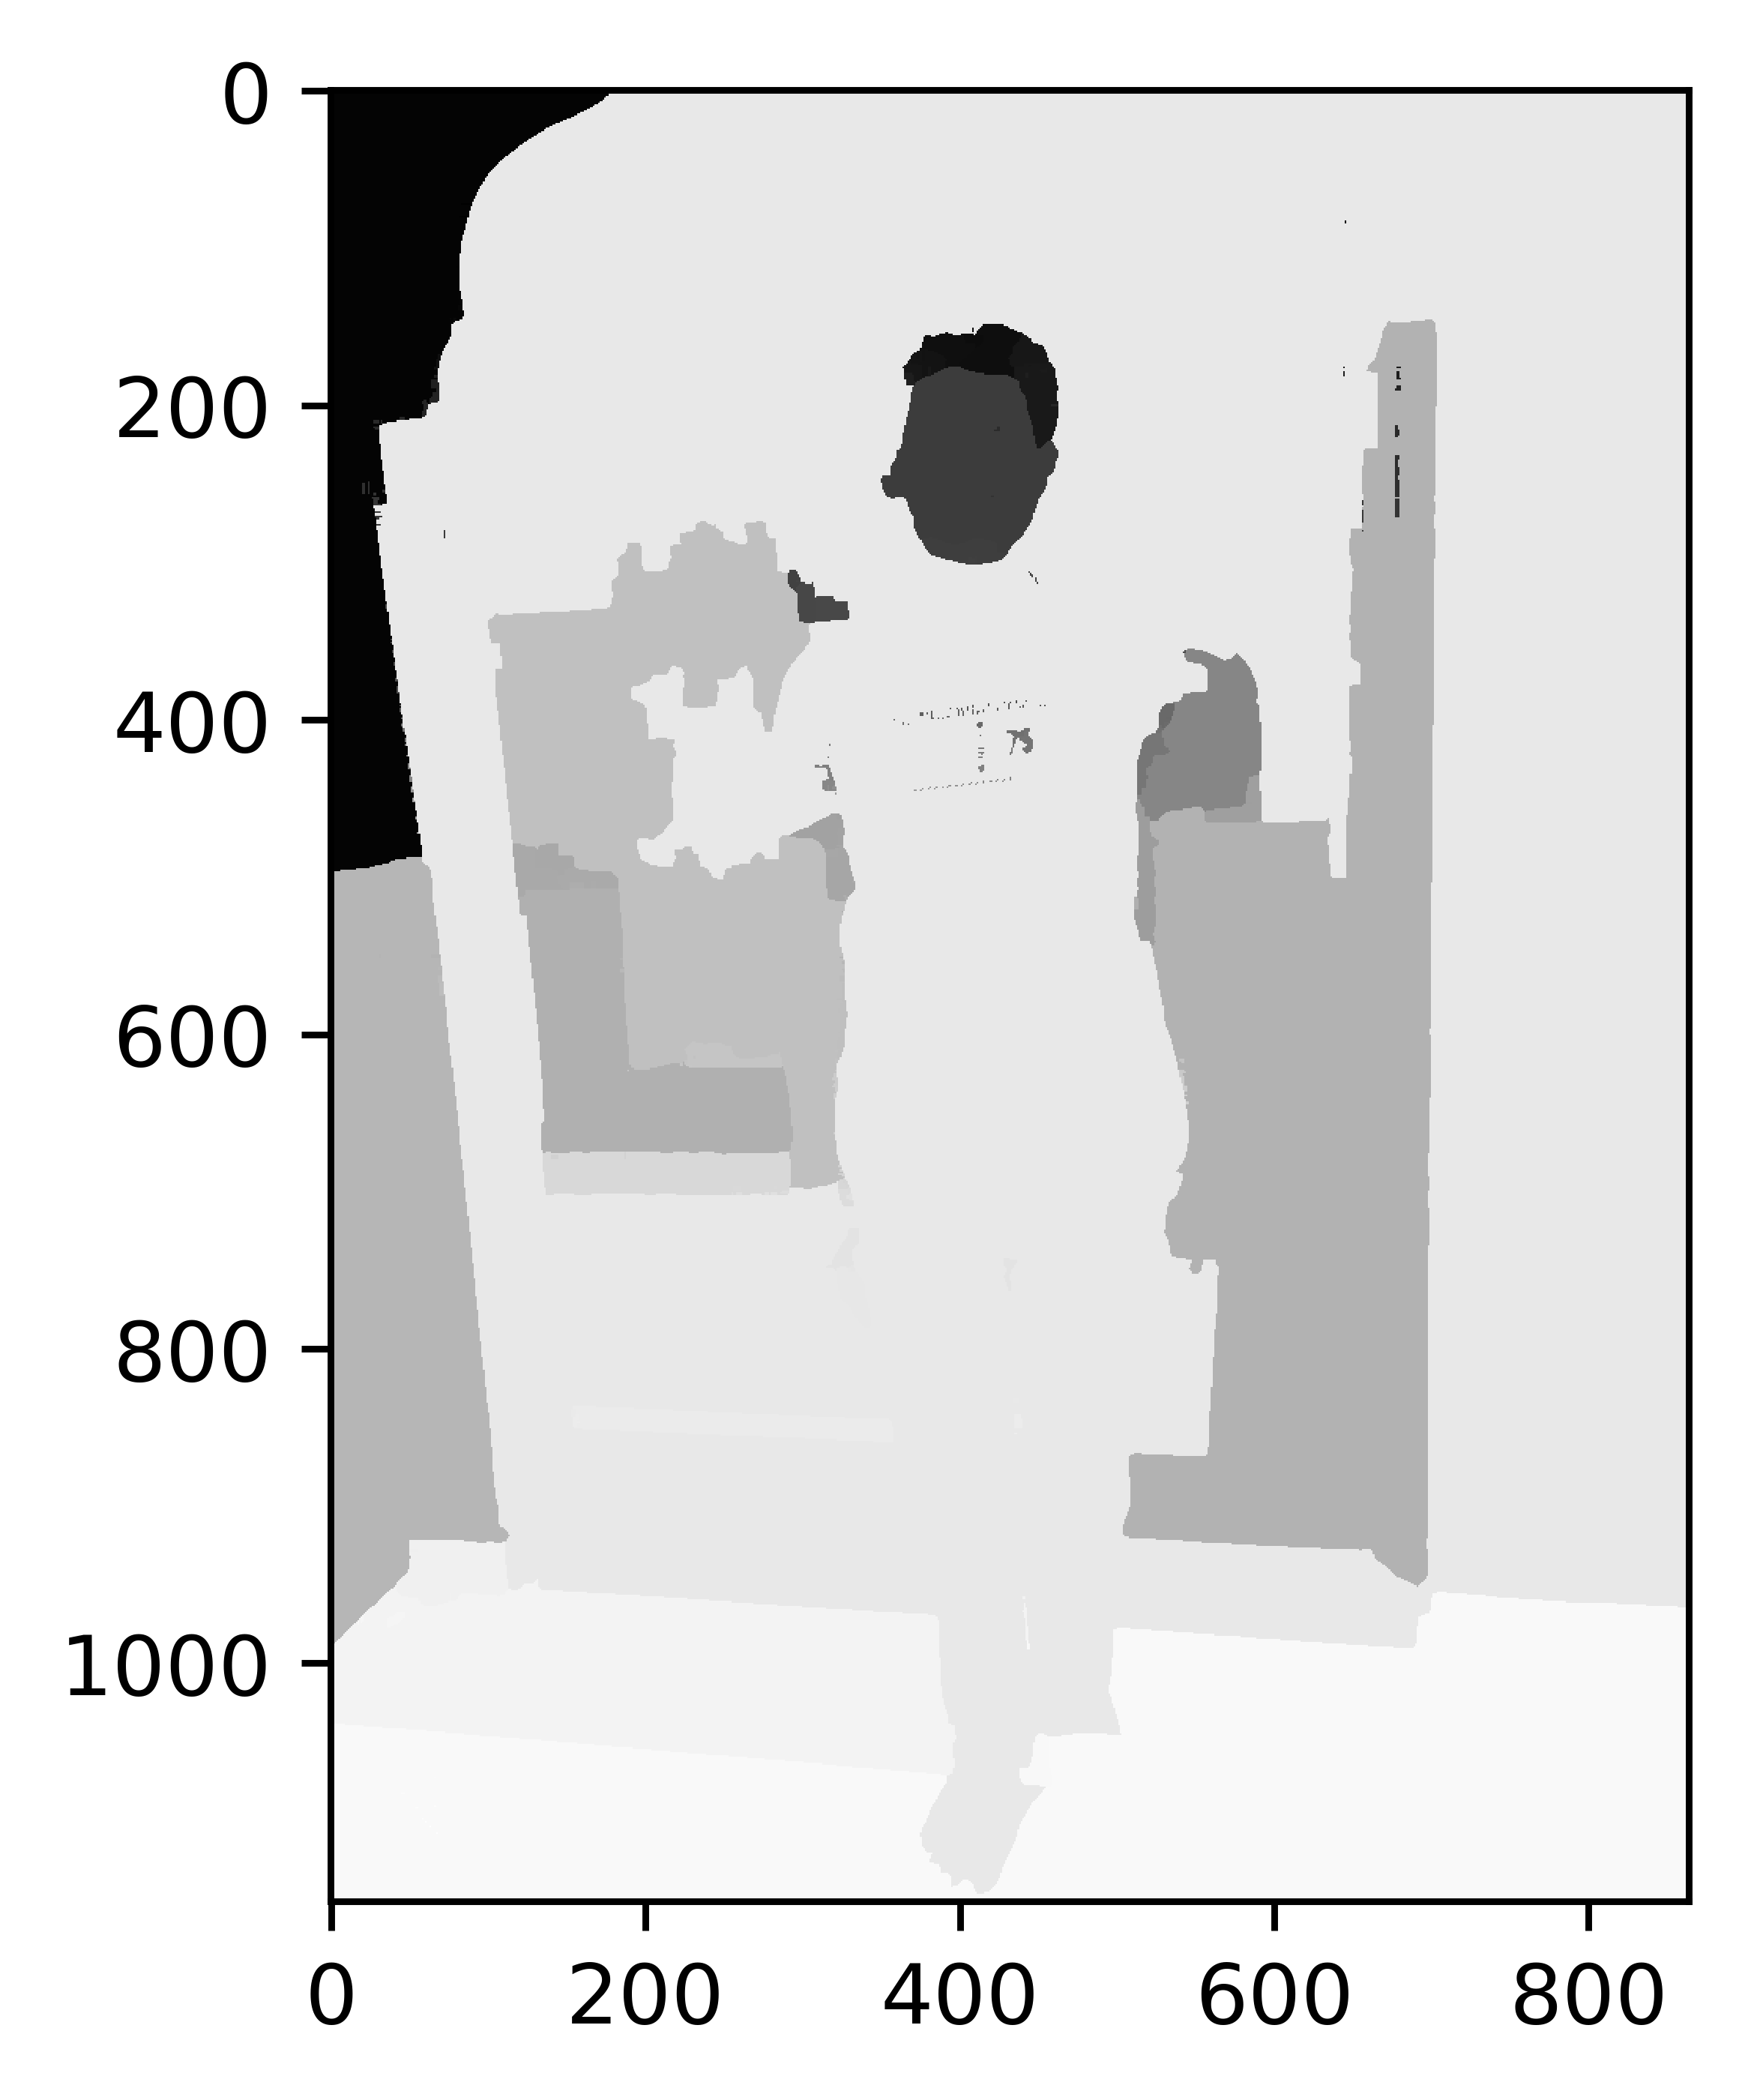

In [25]:
from skimage import morphology
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

In [26]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

294

In [27]:
background_mask = (ws == background)

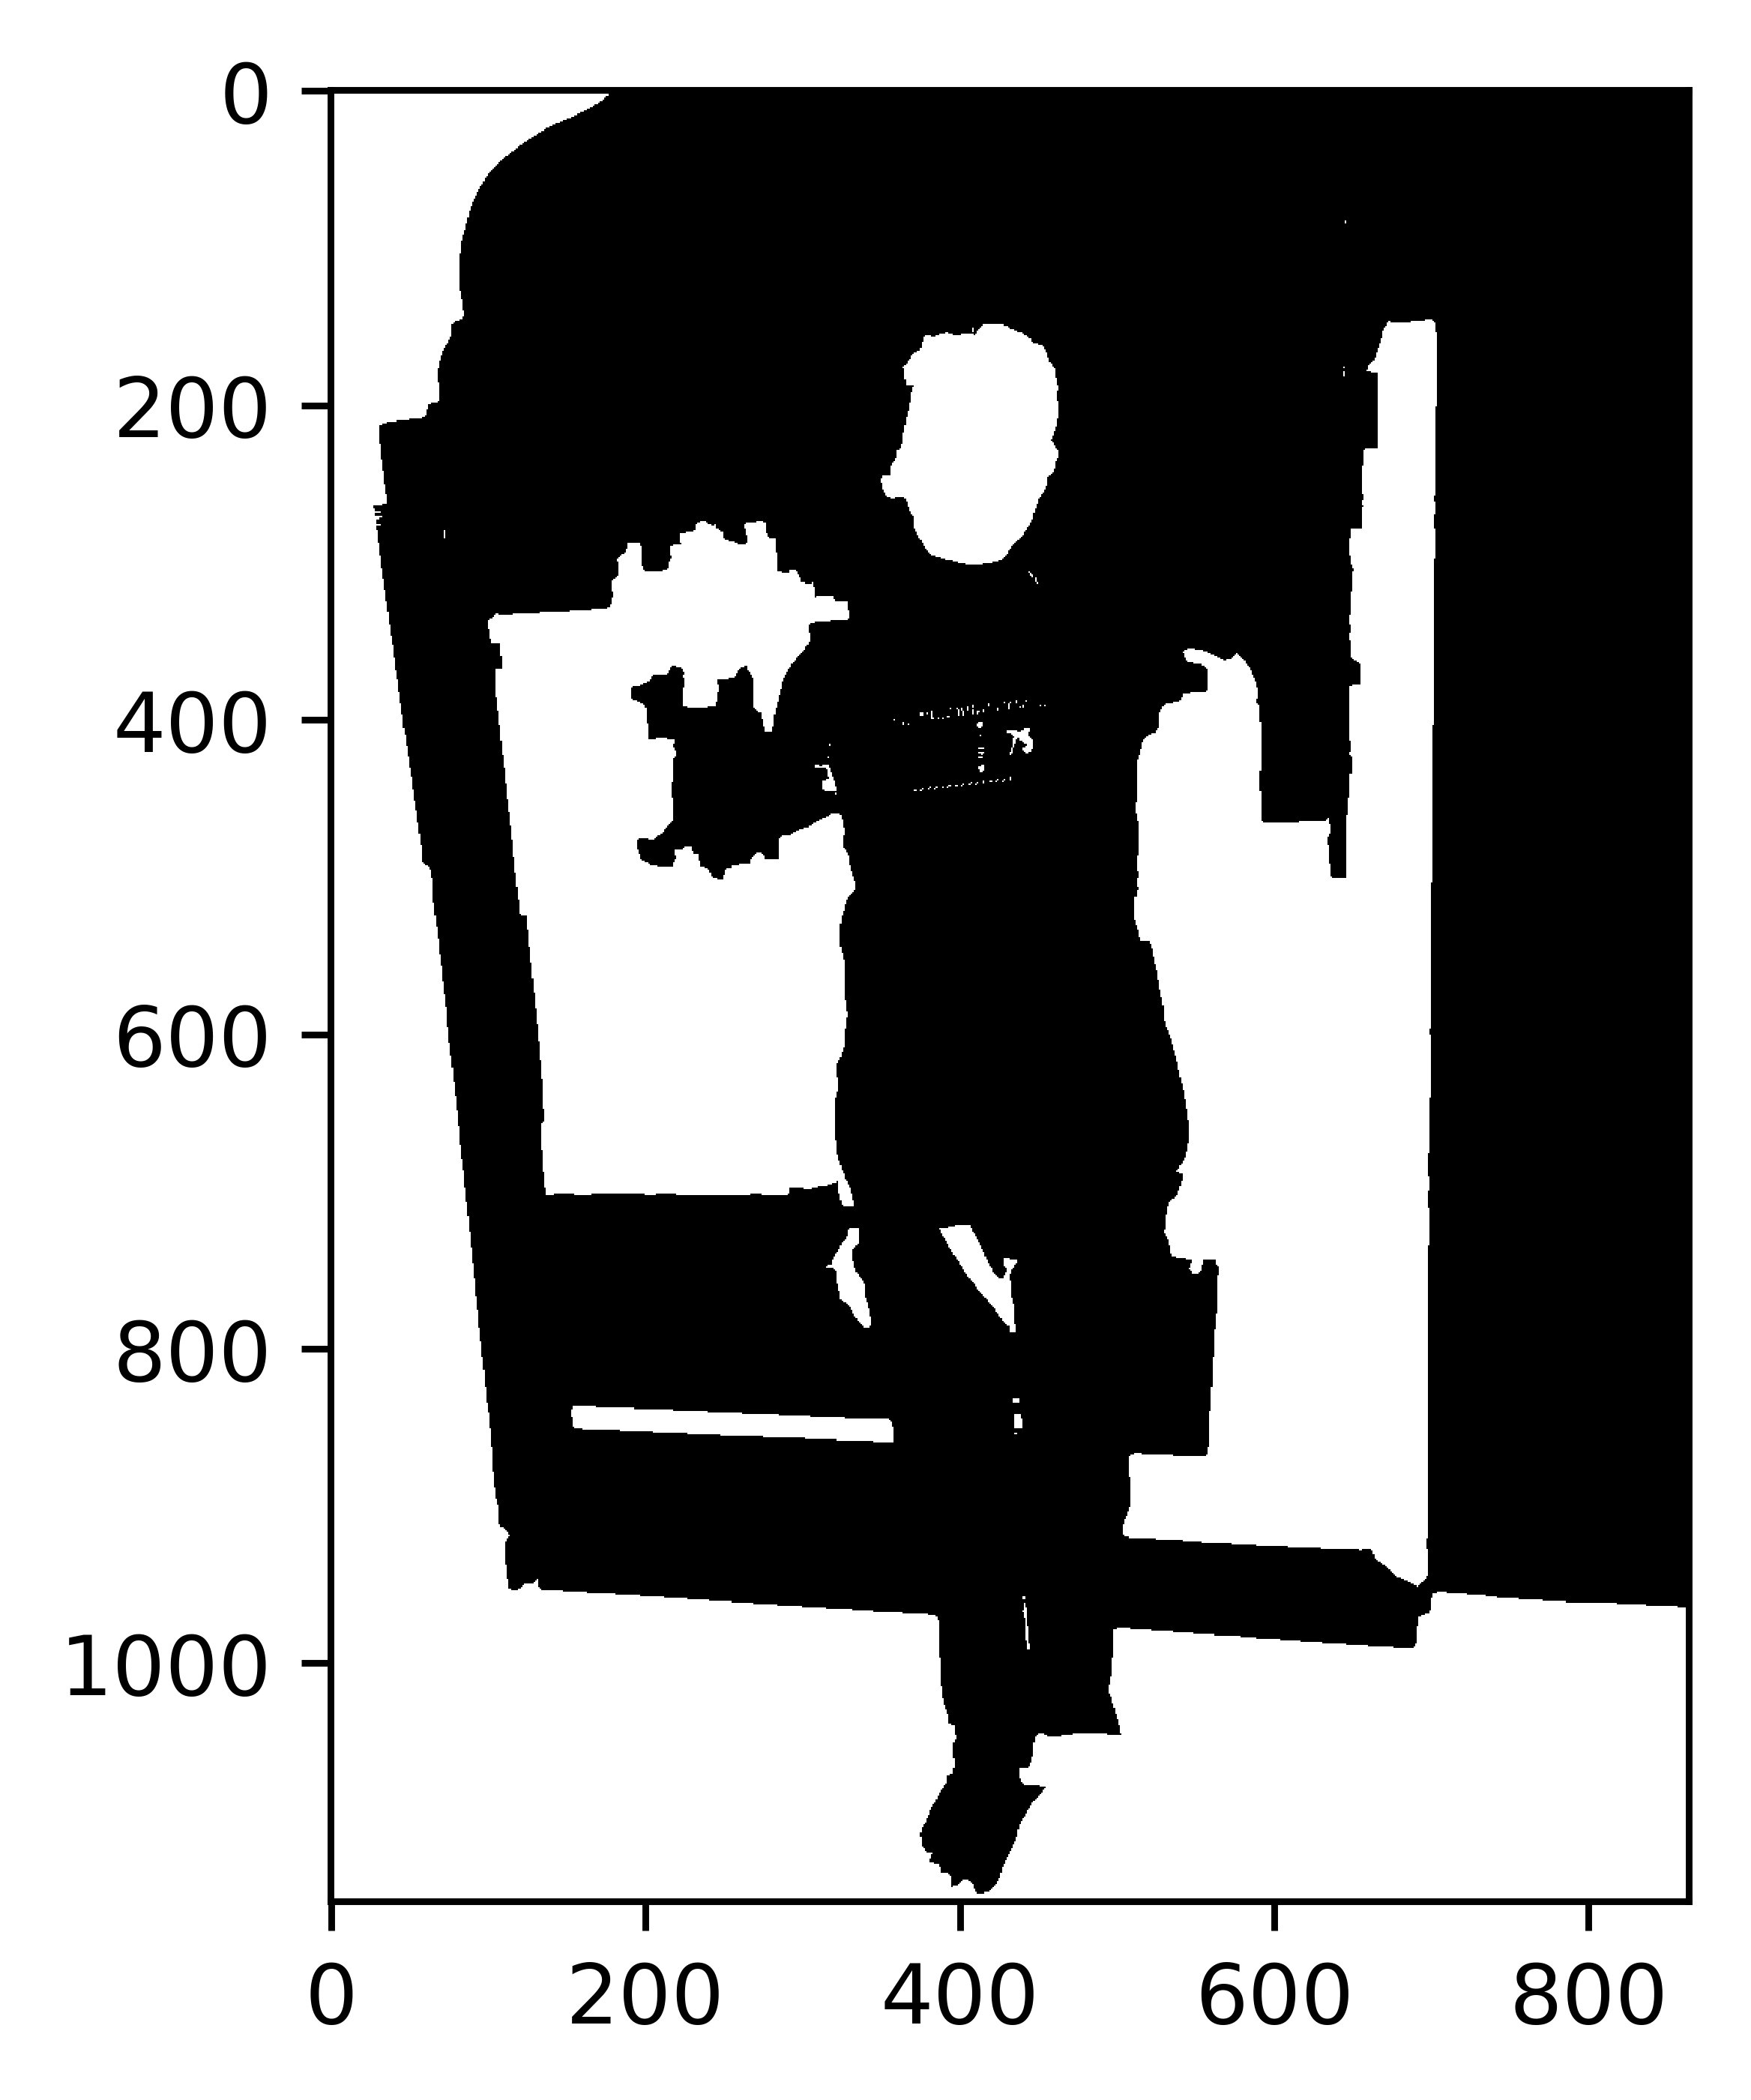

In [28]:
plt.imshow(~background_mask)

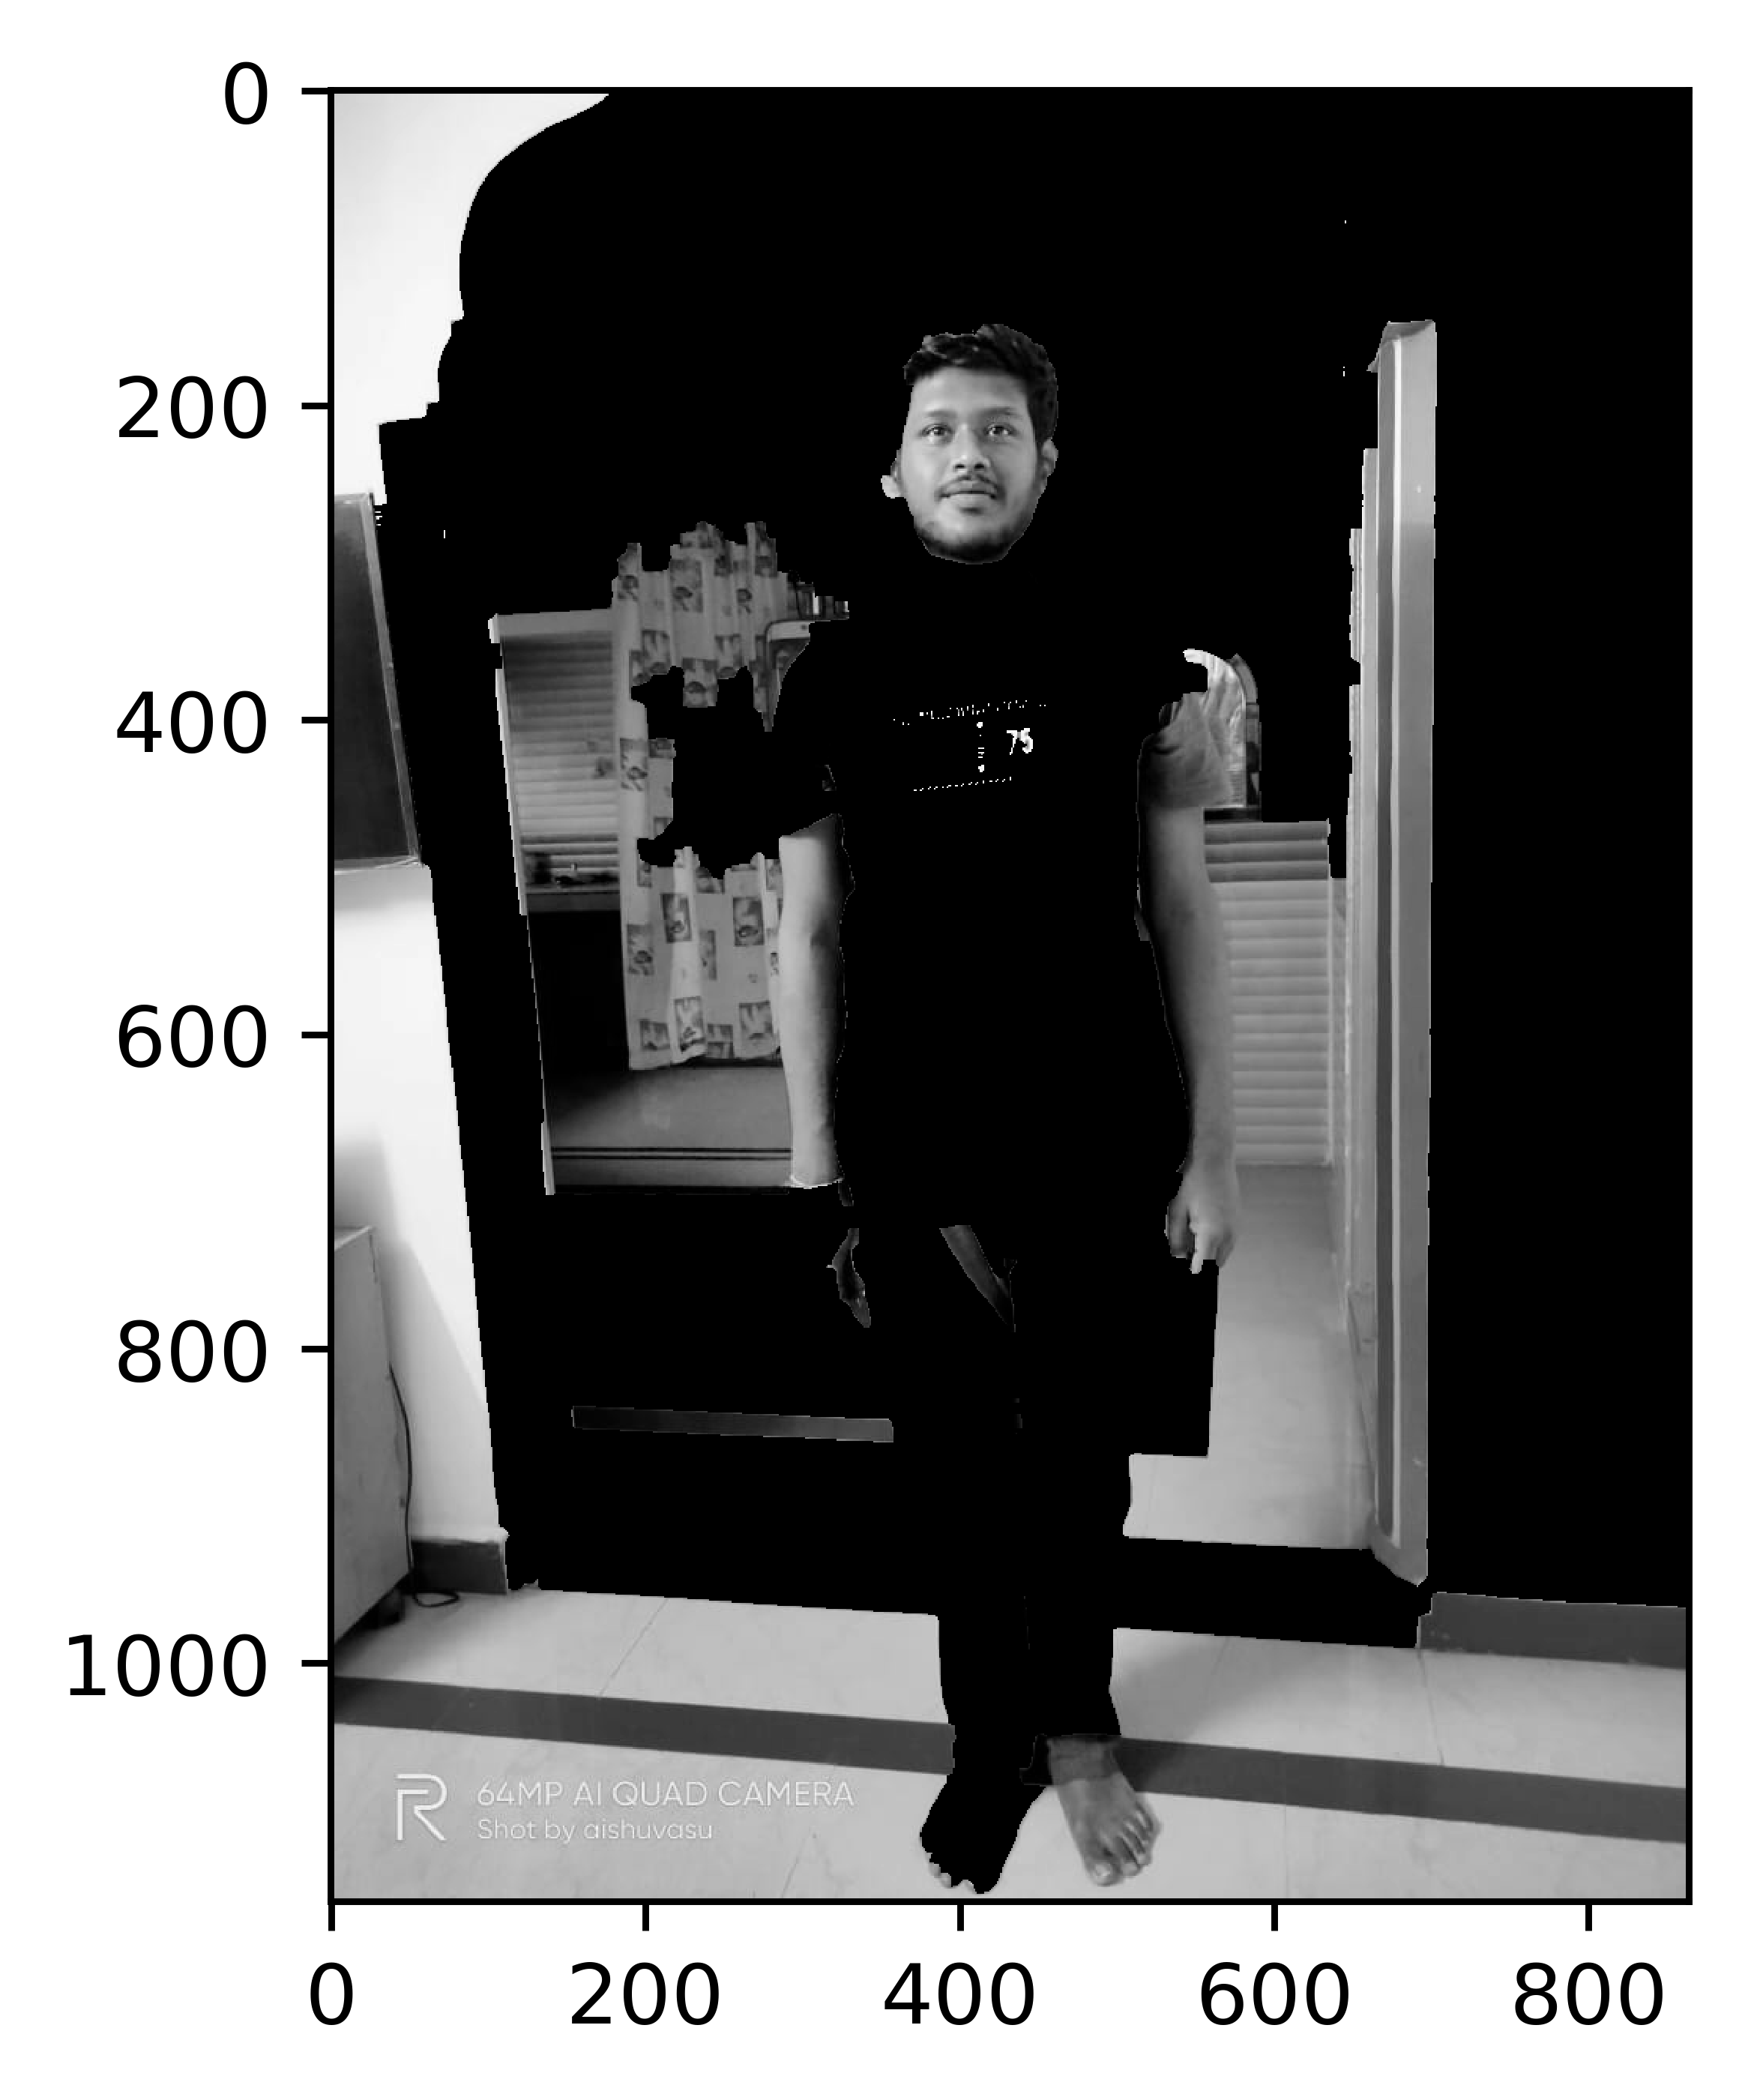

In [30]:
cleaned = gray * ~background_mask
plt.imshow(cleaned)

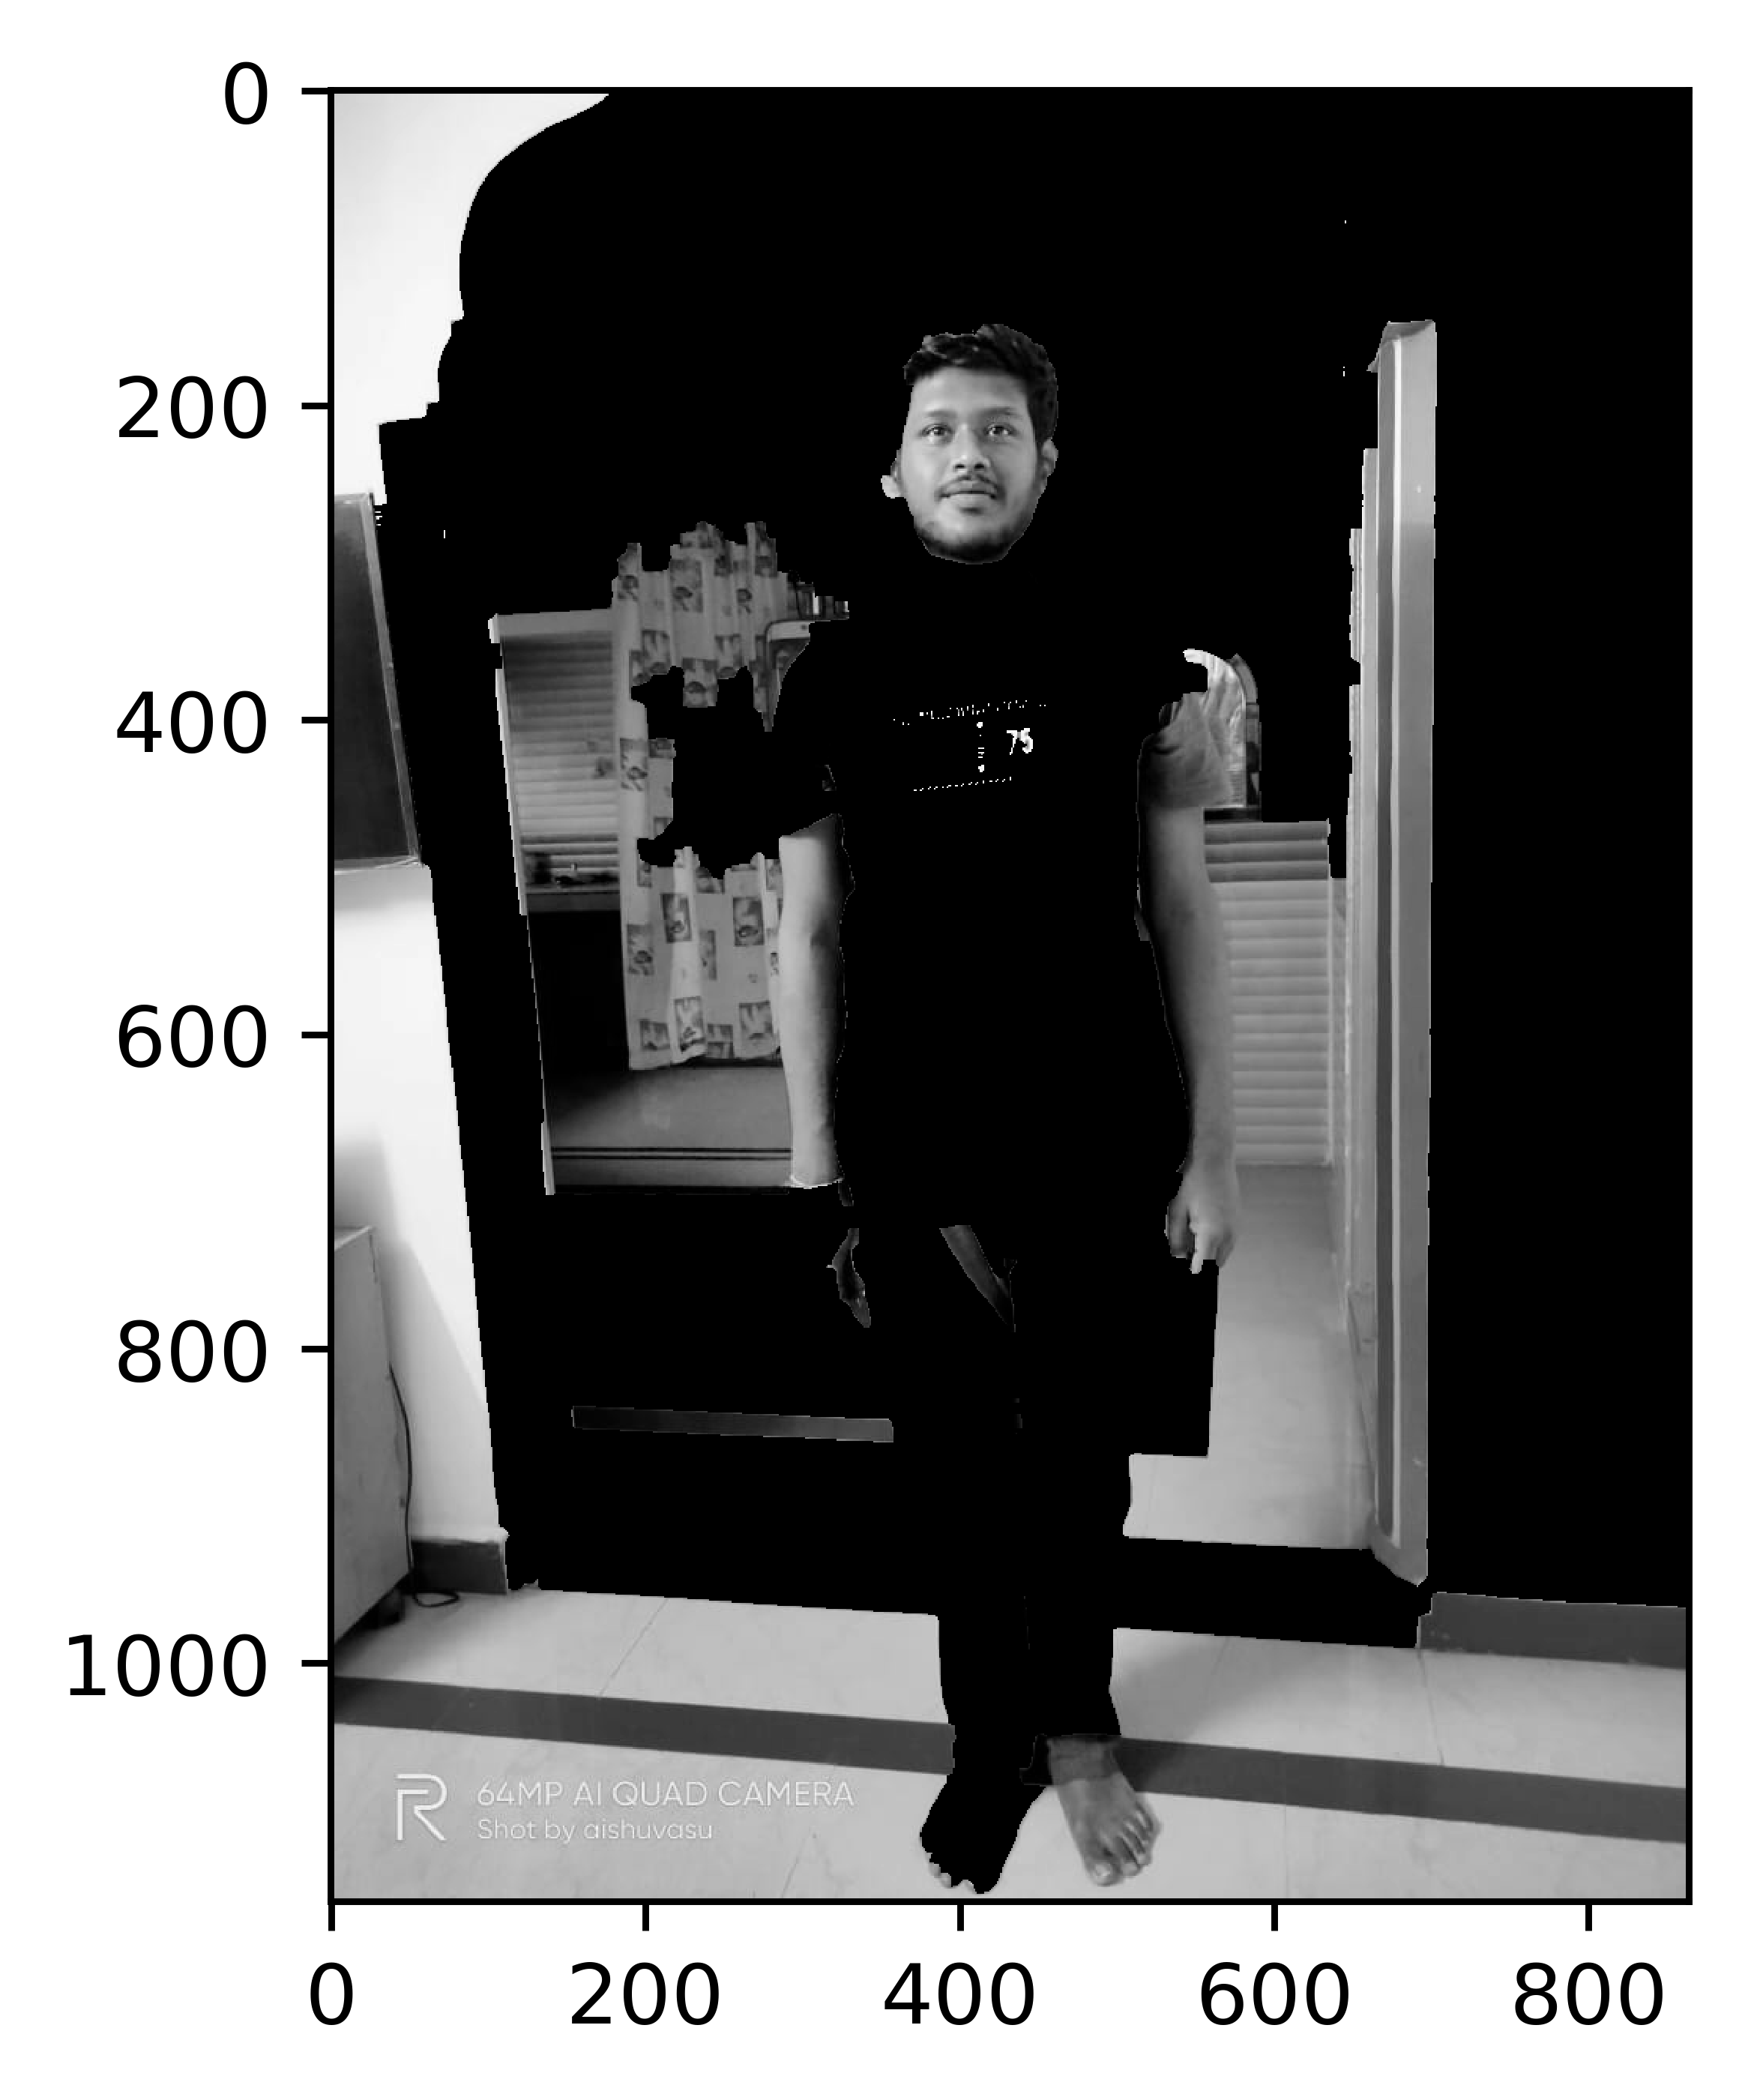

In [31]:
plt.imshow(cleaned, cmap='gray')
plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))